----
# QDA classification using sklearn

----

In [1]:
%load_ext autoreload
%autoreload 2

from sklearn.metrics import confusion_matrix as skconfmatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Set correct working directory
if os.getcwd() != os.path.abspath("../Python"):
    os.chdir("../../Python")

# Import files from /Python directory
from confusion_matrix import confusion_matrix


"""
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})
"""

'\nplt.rcParams.update({\n    "text.usetex": True,\n    "font.family": "cmr"\n})\n'

In [2]:
# Use noisy data sets
noise = False

# Load data sets
trn_data = pd.read_csv(f"../TrainingData/neodata/soltani_all_{'' if noise else 'no'}noise_1200.csv")
vld_data = pd.read_csv(f"../ValidationData/neodata/soltani_all_{'' if noise else 'no'}noise_1200.csv")
tst_data = pd.read_csv(f"../TestData/neodata/soltani_all_{'' if noise else 'no'}noise_100.csv")

# Separate into data and targets
y_trn = trn_data.pop('target')
X_trn = trn_data

y_vld = vld_data.pop('target')
X_vld = vld_data

y_tst = tst_data.pop('target')
X_tst = tst_data

## Standardize data (z-norm)

In [3]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()

X_trn = standardizer.fit_transform(X_trn)
X_vld = standardizer.transform(X_vld)
X_tst = standardizer.transform(X_tst)

---

# QDA fitting

In [4]:
from sklearn import discriminant_analysis
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()

clf = qda.fit(X_trn,y_trn)

c:\Users\is123\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# Classifying training data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'Full-QDA on training set : Accuracy 96.127%'}, xlabel='Predicted class', ylabel='True class'>)

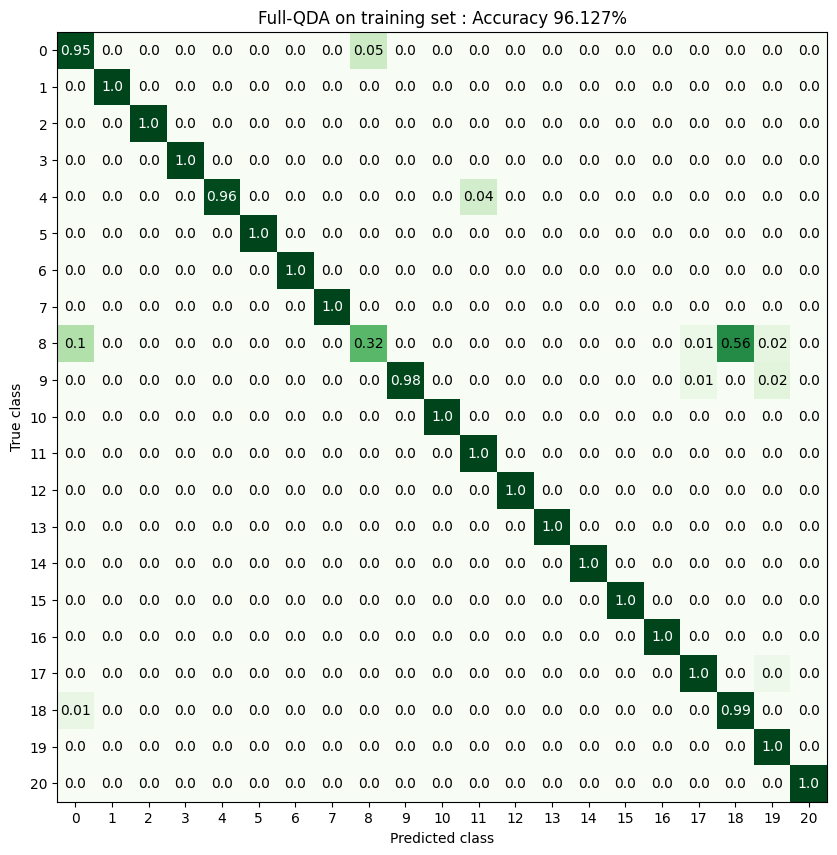

In [5]:
# Make predictions for the training set
y_hat_trn = clf.predict(X_trn)

#plot the confusion matrix
conf_matrix_trn = skconfmatrix(y_trn,y_hat_trn)
confusion_matrix(conf_matrix_trn, figsize = (10,10),title='Full-QDA on training set')

# Classifying validation data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'Full-QDA on validation set : Accuracy 95.984%'}, xlabel='Predicted class', ylabel='True class'>)

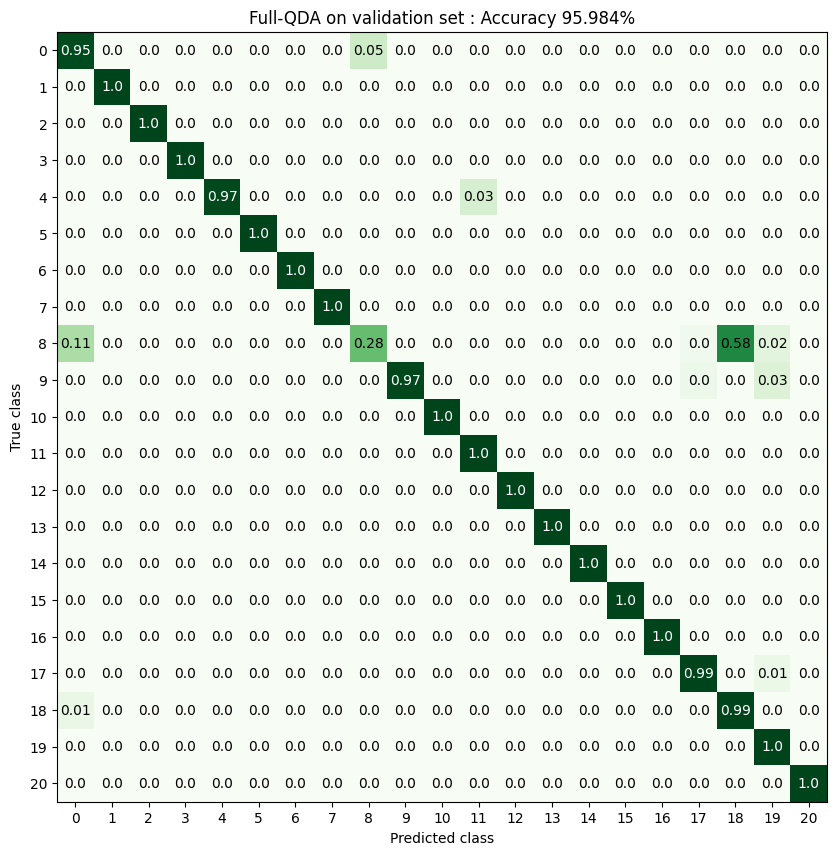

In [6]:
# Make predictions for the training set
y_hat_vld = clf.predict(X_vld)

#plot the confusion matrix
conf_matrix_vld = skconfmatrix(y_vld,y_hat_vld)
confusion_matrix(conf_matrix_vld, figsize = (10,10),title='Full-QDA on validation set', save_fig_name='Full-QDA 11d validation confusion matrix.pdf',eval_labels = False)

# Classifying test data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'Full-QDA on test set : Accuracy 57.143%'}, xlabel='Predicted class', ylabel='True class'>)

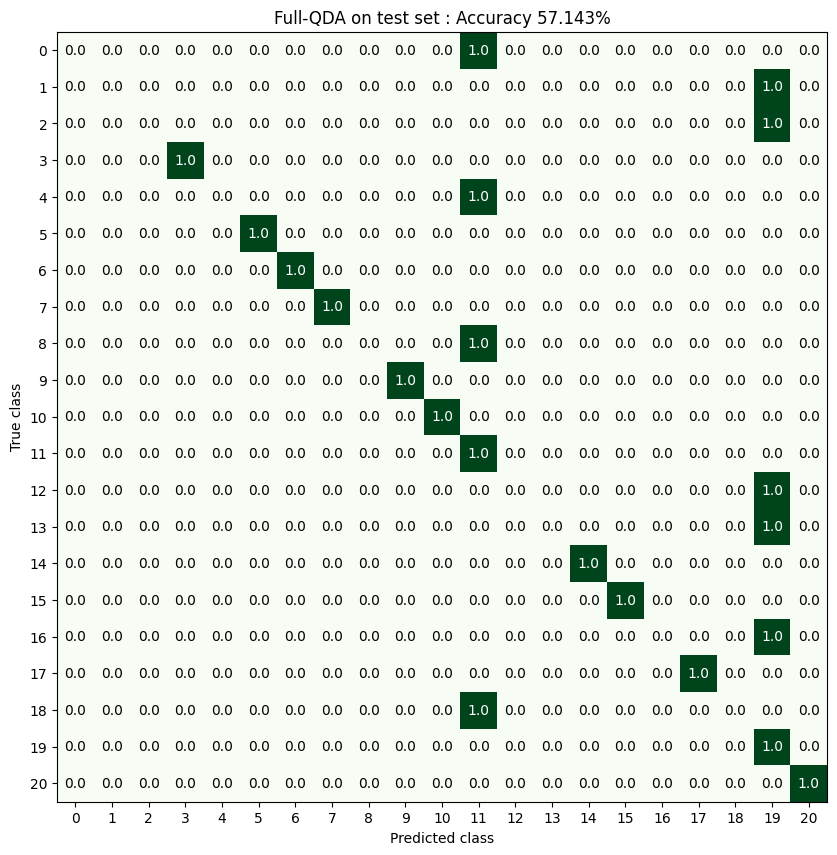

In [7]:
# Make predictions for the training set
y_hat_tst = clf.predict(X_tst)

#plot the confusion matrix
conf_matrix_vld = skconfmatrix(y_tst,y_hat_tst)
confusion_matrix(conf_matrix_vld, figsize = (10,10),title='Full-QDA on test set', save_fig_name='Full-QDA 11d test confusion matrix.pdf',eval_labels = False)